     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         0   19                  15                      39
1         0   21                  15                      81
2         1   20                  16                       6
3         1   23                  16                      77
4         1   31                  17                      40
..      ...  ...                 ...                     ...
195       1   35                 120                      79
196       1   45                 126                      28
197       0   32                 126                      74
198       0   32                 137                      18
199       0   30                 137                      83

[200 rows x 4 columns]
[[-1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.12815215 -1.28103541 -1.73899919  1.19570407]
 [ 0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [ 0.88640526 -1.13750203 -1.70082976  1.04041783]
 [ 0.88640526 -0.56336851 -1.66266033 -0

C:\Users\vatch\AppData\Local\Temp\ipykernel_23172\2740263435.py:28: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vatch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


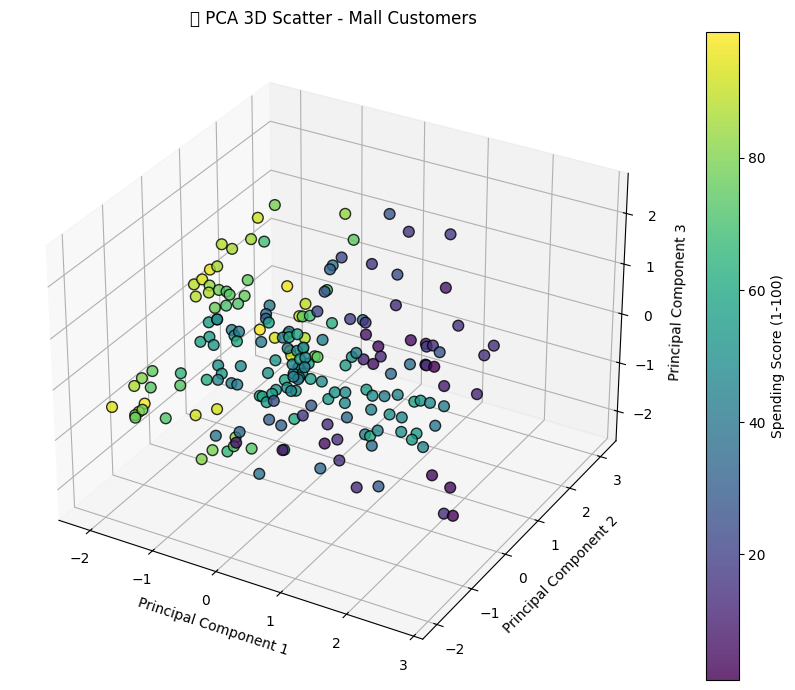


🔍 Explained Variance Ratio (PC1, PC2, PC3): [0.33690046 0.26230645 0.23260639]
✅ Cumulative Explained Variance: [0.33690046 0.5992069  0.83181329]


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv("Mall_Customers.csv")
df.head()
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
X = df.drop(columns=['CustomerID'])
print(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
print("X_pca:",X_pca)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colors = df['Spending Score (1-100)']
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=colors, cmap='viridis', s=60, edgecolor='k', alpha=0.8)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("🎯 PCA 3D Scatter - Mall Customers")
fig.colorbar(scatter, ax=ax, label='Spending Score (1-100)')
plt.tight_layout()
plt.show()
print("\n🔍 Explained Variance Ratio (PC1, PC2, PC3):", pca.explained_variance_ratio_)
print("✅ Cumulative Explained Variance:", np.cumsum(pca.explained_variance_ratio_))
